In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def spec(path, sample):
    pal = 'viridis'
    col = ["Frequency (Hz)", "Z'", "-Z''", "Fit Frequency (Hz)", "Fit Z'", "Fit -Z''" ]
    files = [os.path.join(path, i) for i in os.listdir(path) if 'spectra' in i] # Check file name
    spectra = pd.DataFrame()
    n = 0
    for i in files:   
        df_s = pd.read_csv(i, skiprows=4, sep = '\t', names=col)

        df_s[col[2]] = -df_s[col[2]]
        df_s[col[5]] = -df_s[col[5]]
        df_s['Run'] = n
        spectra = pd.concat([spectra, df_s], ignore_index=True)
        n += 1

    fig, ax = plt.subplots(dpi = 200)
    sns.scatterplot(data = spectra, x = col[1], y = col[2], legend = False, hue = 'Run', palette=pal)
    sns.lineplot(data = spectra, x = col[4], y = col[5],  hue = 'Run', legend = False, palette=pal)
    plt.title(sample)
    
    return spectra
    

In [ ]:
# =========2:1 LiFSI:BMP TFSI=============
path = r'C:\Users\lopezb41\OneDrive - imec\Desktop\Third round baby\T02'
sample = '2:1 Li FSI:BMP'
spectra = spec(path, sample)

In [ ]:
# =========3:1 LiFSI:BMP TFSI=============
path = r'C:\Users\lopezb41\OneDrive - imec\Desktop\Third round baby\T03'
sample = '3:1 Li FSI:BMP'
spectra_0 = spec(path, sample)

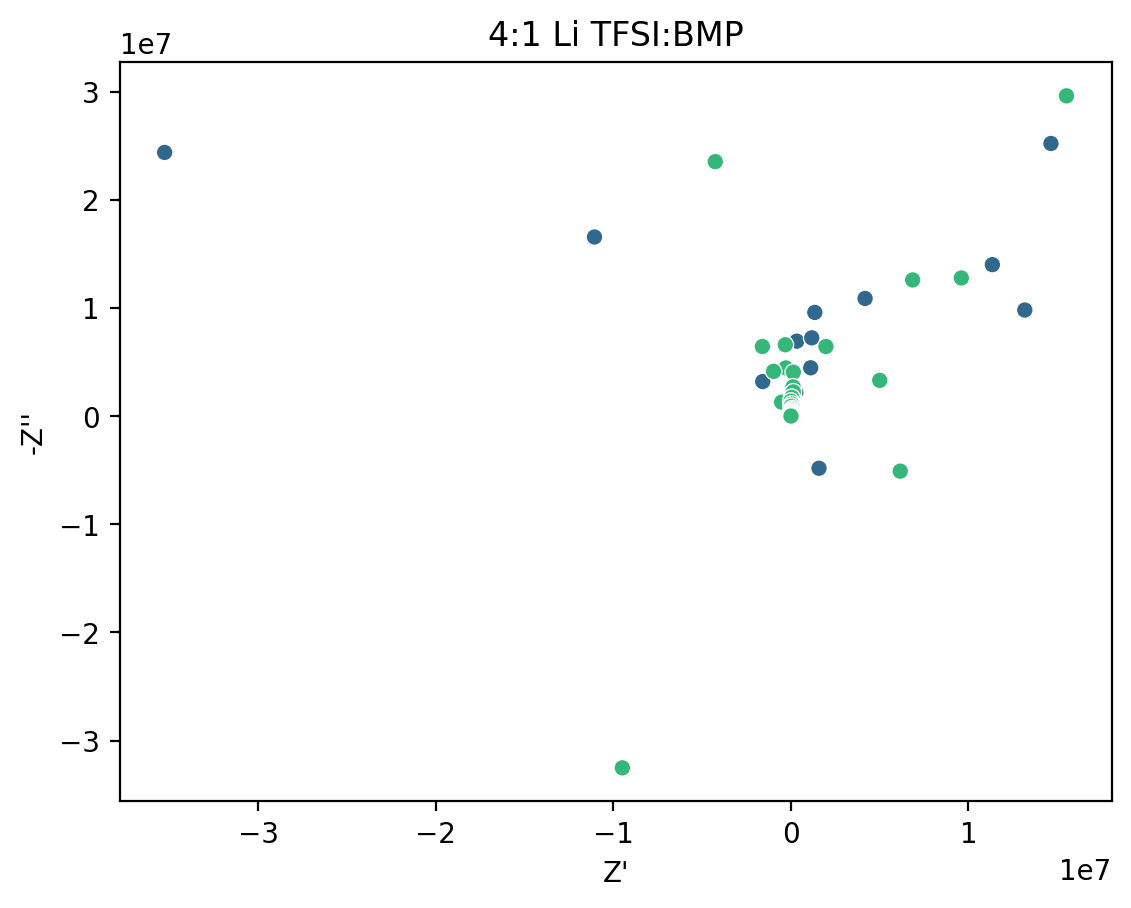

In [32]:
# ============ 4:1 LiT TFSI
path = r'C:\Users\lopezb41\OneDrive - imec\Desktop\Third round baby\L01'
sample = '4:1 Li TFSI:BMP'
spectra_1 = spec(path, sample)